In [1]:
import numpy as np
import pandas as pd
from scipy.stats import qmc

In [2]:
n_samples = 54
n_task = 9
n_var = 4

lower_bounds = [5, 220, 0.3, 1.5]
upper_bounds = [30, 270, 1.6, 4.5]

# for n_samples, we fix half for anchoring
base_samples = int(n_samples/(2*n_task))
remain_samples = n_samples - n_task*base_samples

# we went with LHS with strength=1 for ease of usage
# it is already better than strength=0 QMC
sampler = qmc.LatinHypercube(d=n_var)
samples = sampler.random(n=base_samples+remain_samples)
samples = qmc.scale(samples, lower_bounds, upper_bounds)
samples

array([[ 23.44756867, 234.9870255 ,   0.89574592,   2.68722959],
       [  9.01717038, 255.33569611,   1.34872774,   3.79522554],
       [ 29.86145465, 224.24220007,   1.54054445,   1.87588958],
       [ 21.81218239, 249.67584828,   0.41579098,   3.41275156],
       [ 10.81947046, 238.53003228,   0.7682688 ,   2.35840397],
       [  6.82670135, 228.98404961,   0.62534409,   4.38885343],
       [ 16.18772037, 227.11649218,   0.36017959,   2.7752292 ],
       [  9.93040886, 247.62155381,   1.13675511,   2.01153246],
       [ 24.66032393, 231.00583839,   0.46874436,   1.51998624],
       [ 18.9311918 , 265.41055085,   0.71773855,   3.06004786],
       [ 21.61195352, 232.68989831,   1.26967494,   2.41252425],
       [  8.31302189, 264.67945448,   0.33185995,   4.1115574 ],
       [ 12.52032513, 242.13750023,   0.94100306,   1.65913729],
       [ 12.10410938, 253.45156187,   1.30527847,   4.21058958],
       [ 14.50973886, 259.6452045 ,   0.53294346,   3.37163681],
       [ 27.40866707, 257

In [3]:
# first base_samples get tiled as they are the anchoring ones
# since the number is nice and round to 54/9
# we just fix the remain_samples to follow the task as well
sample1 = samples[:base_samples]
x1 = np.tile(sample1, (n_task, 1))
x2 = samples[base_samples:base_samples+remain_samples]
tasks = np.repeat(np.arange(n_task), base_samples).reshape(-1,1)

x = np.vstack([x1, x2])
task = np.vstack([tasks, tasks])

# convert to dataframe
columns = [['Ligand Amount (mg)',
            'Reaction Temperature (C)',
            'Cs/Pb Ratio',
            'Yb/Pb Ratio',
            'Ligand'
          ]]

df = pd.DataFrame(np.hstack([x, task]), columns=columns)
df = df.round(1)
df

,Ligand Amount (mg),Reaction Temperature (C),Cs/Pb Ratio,Yb/Pb Ratio,Ligand
0,23.4,235.0,0.9,2.7,0.0
1,9.0,255.3,1.3,3.8,0.0
2,29.9,224.2,1.5,1.9,0.0
3,23.4,235.0,0.9,2.7,1.0
4,9.0,255.3,1.3,3.8,1.0
5,29.9,224.2,1.5,1.9,1.0
6,23.4,235.0,0.9,2.7,2.0
7,9.0,255.3,1.3,3.8,2.0
8,29.9,224.2,1.5,1.9,2.0
9,23.4,235.0,0.9,2.7,3.0


array([[<Axes: title={'center': "('Ligand Amount (mg)',)"}>,
        <Axes: title={'center': "('Reaction Temperature (C)',)"}>],
       [<Axes: title={'center': "('Cs/Pb Ratio',)"}>,
        <Axes: title={'center': "('Yb/Pb Ratio',)"}>]], dtype=object)

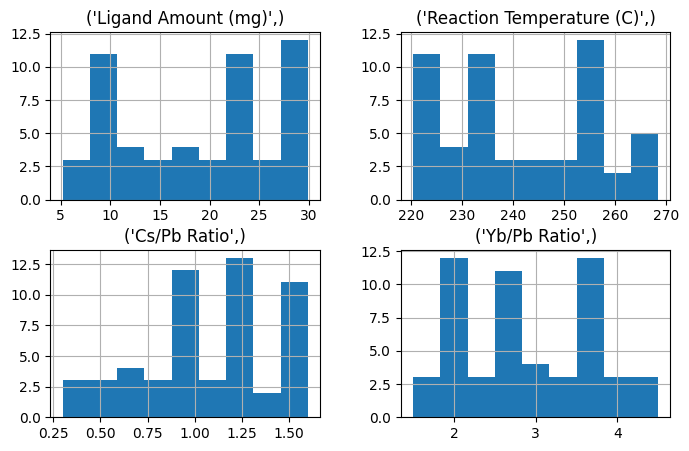

In [4]:
df.hist(column=['Ligand Amount (mg)',
            'Reaction Temperature (C)',
            'Cs/Pb Ratio',
            'Yb/Pb Ratio',],
figsize=(8,5), bins=9)

In [5]:
# convert the task indicator to a nice list

ligand_dict = {0.0: 'ASC-10',
               1.0: 'ASC-12',
               2.0: 'ASC-14',
               3.0: 'ASC-16',
               4.0: 'MAPCHO-10',
               5.0: 'MAPCHO-12',
               6.0: 'MAPCHO-14',
               7.0: 'MAPCHO-16',
               8.0: 'Lecithin',    
              }

df[['Ligand']] = df[['Ligand']].map(lambda x: ligand_dict[x])
df

,Ligand Amount (mg),Reaction Temperature (C),Cs/Pb Ratio,Yb/Pb Ratio,Ligand
0,23.4,235.0,0.9,2.7,ASC-10
1,9.0,255.3,1.3,3.8,ASC-10
2,29.9,224.2,1.5,1.9,ASC-10
3,23.4,235.0,0.9,2.7,ASC-12
4,9.0,255.3,1.3,3.8,ASC-12
5,29.9,224.2,1.5,1.9,ASC-12
6,23.4,235.0,0.9,2.7,ASC-14
7,9.0,255.3,1.3,3.8,ASC-14
8,29.9,224.2,1.5,1.9,ASC-14
9,23.4,235.0,0.9,2.7,ASC-16


In [6]:
df.to_csv('batch0.csv')